- Name: Muhammad Rizki Achirlita
- Gmail: muh.rizkiachirlita@gmail.com

#### Content

| Column                       | Descriptions                                                    |
| ---------------------------  |  ---------------------------------------------------------- |
| ID                           | Unique customer ID                                            |
| Year_Birth                   | Year of birth customer                                          |
| Education                    | Customer's level of education                            |
| Marital_Status               | Customer's marital status                           |
| Income                       | Customer's yearly household income                                                   |
| Kidhome                      | Number of small children in customer’s household             |
| Teenhome                     | Number of teenagers in customer’s household                          |
| Dt_Customer                  | Date of customer's enrolment with the company                                           |
| Recency                      | Number of days since the last purchase        |
| MntCoke                      | Amount spent on coke products in the last 2 years |
| MntFruits                    | Amount spent on fruits products in the last 2 years       |
| MntMeatProducts            |  Amount spent on meat products in the last 2 years                  |
| MntFishProducts               |  Amount spent on Fish products in the last 2 years                                  |
| MntSweetProducts             | Amount spent on sweet products in the last 2 years            |
| MntGoldProds                    | Amount spent on gold products in the last 2 years                   |
| NumDealsPurchases           | Number of purchases made with discount                  |
| NumWebPurchases                  | Number of purchases made through company’s web site          |
| NumCatalogPurchases                  |  Number of purchases made using catalogue   |
| NumStorePurchases           | Number of purchases made directly in stores            |
| NumWebVisitsMonth              | Number of visits to company’s web site in the last month                              |
| AcceptedCmp3                  | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  |
| AcceptedCmp4                  | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  |
| AcceptedCmp5                  | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  |
| AcceptedCmp1                  | 1 if customer accepted the offer in the 1st campaign, 0 otherwise  |
| AcceptedCmp2                  | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  |
| Complain                      | 1 if customer complained in the last 2 years |
| Z_CostContact                 | Cost to contact a customer |
| Z_Revenue                     | Revenue after client accepting campaign  |
| Response                      |  1 if customer accepted the offer in the last campaign, 0 otherwise  |


referensi: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Load Dataset

In [271]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 150
pd.options.display.max_columns = 50

In [272]:
df= pd.read_csv('marketing_campaign_data.csv')
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1904,10951,1968,S1,Menikah,45688000.0,0,1,25-01-2014,20,279000,0,18000,0,0,9000,2,3,1,8,4,0,1,0,0,0,0,3,11,0
10,1994,1983,S1,Menikah,NaN,1,0,15-11-2013,11,5000,5000,6000,0,2000,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
119,9862,1969,S1,Bertunangan,21918000.0,1,0,14-11-2013,37,1000,6000,7000,11000,5000,3000,2,2,0,3,6,0,0,0,0,0,0,3,11,0


### Feature Engineering

In [273]:
## Penambahan Feature
df['NumberofChildren'] = df['Kidhome']+df['Teenhome']
df['Age'] = 2022 - df['Year_Birth'] 
df['ConvertionRate'] = ((df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp1']+df['AcceptedCmp2'])/df['NumWebVisitsMonth'])*100
df['TotalPurchase'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumberofChildren,Age,ConvertionRate,TotalPurchase
0,5524,1957,S1,Lajang,58138000.0,0,0,04/09/2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,65,0.0,1617000
1,2174,1954,S1,Lajang,46344000.0,1,1,08/03/2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,68,0.0,27000
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,57,0.0,776000


In [274]:
## Penghapusan Feature
df.drop(columns=['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], inplace=True)

#### Alasan menghapus feature
- Feature **ID** tidak membantu dalam pemodelan Machine Learning & 
- **Year_Birth** karena sudah ada feature **Age** yang maknanya sama
- **Z_CostContact** hanya berisi 1 value unik dan tidak sesuai konteks
- **Z_Revenue** hanya berisi 1 value unik dan tidak sesuai konteks

## EXPLORATORY DATA ANALYSIS

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntCoke              2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [276]:
## Pisahkan kolom sesuai dengan tipe data 
kategori = ['Education', 'Marital_Status']
numerik = ['Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'NumberofChildren', 'Age', 
       'TotalPurchase', 'Income', 'ConvertionRate']
Waktu = ['Dt_Customer']

26

In [277]:
df[kategori].describe()

,Education,Marital_Status
count,2240,2240
unique,5,6
top,S1,Menikah
freq,1127,864


In [278]:
df[numerik].describe().T

,count,mean,std,min,25%,50%,75%,max
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.0,49.0,74.0,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.0,173500.0,504250.0,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.0,8000.0,33000.0,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.0,67000.0,232000.0,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.0,12000.0,50000.0,259000.0
MntSweetProducts,2240.0,2.706295e+04,4.128050e+04,0.0,1000.0,8000.0,33000.0,263000.0
MntGoldProds,2240.0,4.402188e+04,5.216744e+04,0.0,9000.0,24000.0,56000.0,362000.0
NumDealsPurchases,2240.0,2.325000e+00,1.932238e+00,0.0,1.0,2.0,3.0,15.0


In [279]:
## Cek Jumlah Data Duplicate
df.duplicated().sum()

183

In [280]:
## Cek Jumlah Null
for x in df:
    null_values= df[x].isna().sum()
    persentase_null = round((df[x].isna().sum()/df.shape[0])*100, 2)
    if null_values > 0:
        print(f'Jumlah null di kolom {x} sebesar {null_values}')

Jumlah null di kolom Income sebesar 24
Jumlah null di kolom ConvertionRate sebesar 10


### UNIVARIATE ANALYSIS

#### Cek Irrational Value

- Tidak ada irrational value

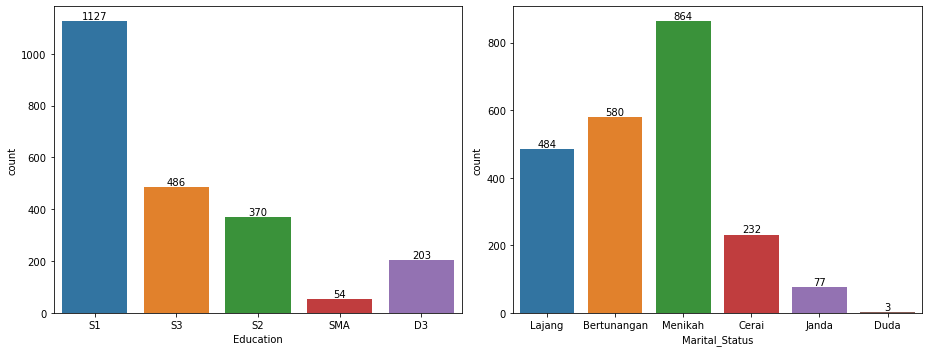

In [264]:
plt.figure(figsize=(13,5))
for a in range(0, len(kategori)):
    plt.subplot(1, 2, a+1)
    ax=sns.countplot(x=df[kategori[a]])
    ax.bar_label(ax.containers[0])
plt.tight_layout()

#### Cek Outliers

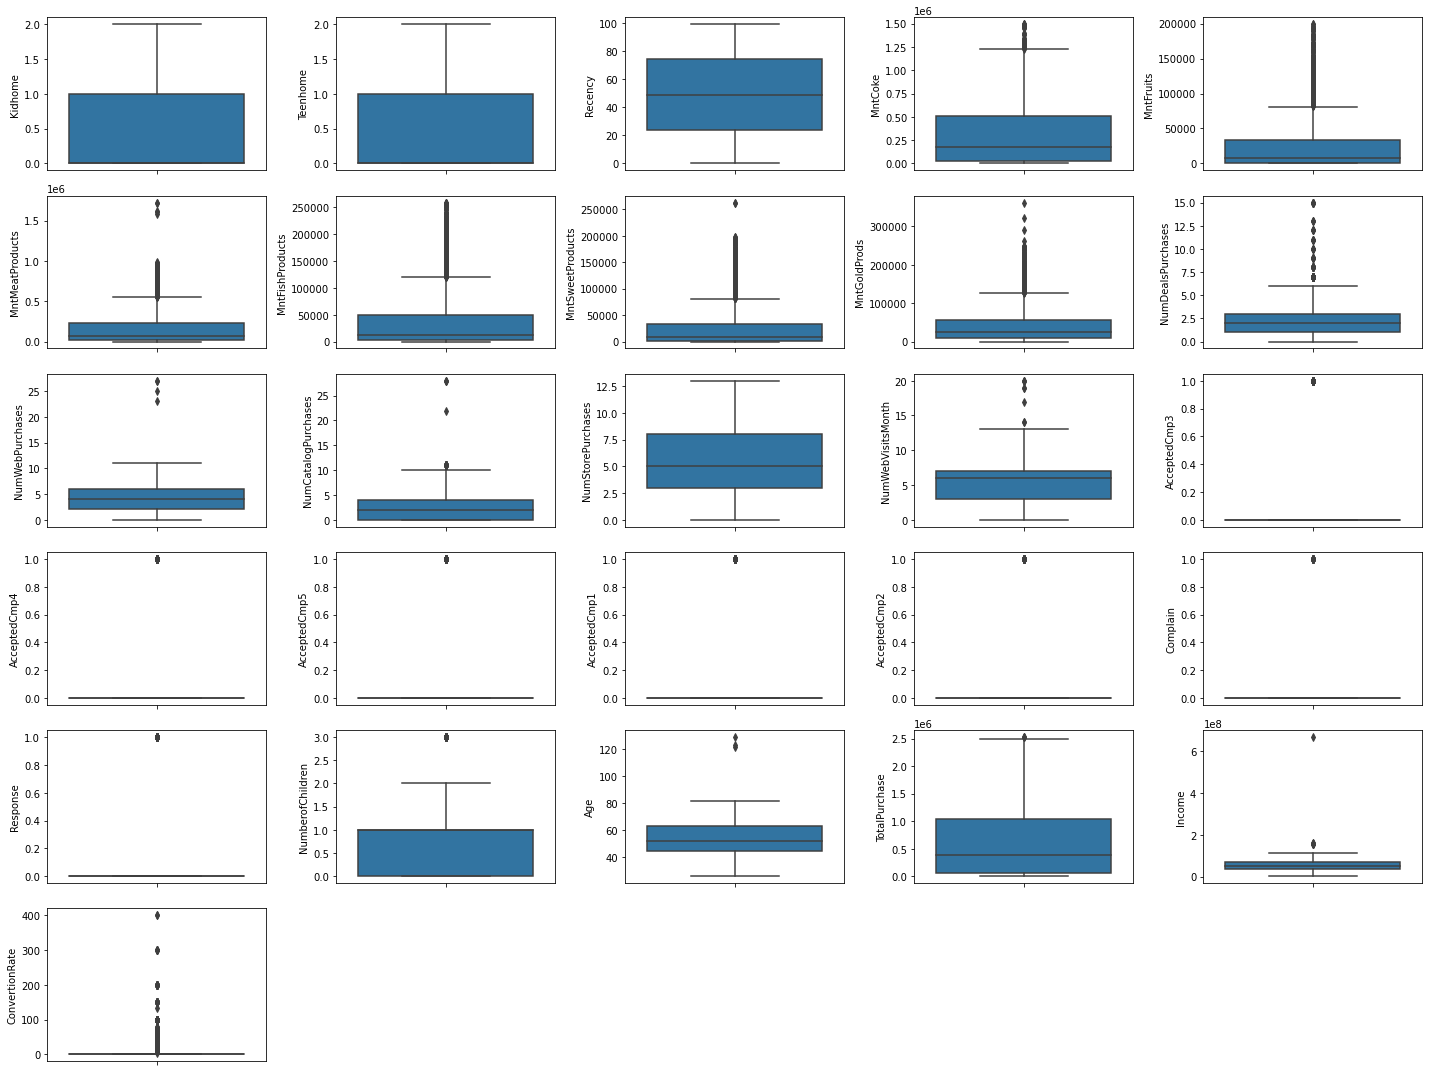

In [294]:
plt.figure(figsize=(20, 15))
for b in range (0, len(numerik)):
    plt.subplot (6, 5, b+1)
    sns.boxplot(y=df[numerik[b]])
plt.tight_layout()

In [302]:
## Number of Outliers
for c in numerik:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5*iqr
    up_lim = q3 + 1.5*iqr
    outlier = []
    for x in df[c]:
      if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)
    if (df[c].nunique() > 2) and len(outlier) != 0 :
      print(f'{c} = {len(outlier)}') 

MntCoke = 35
MntFruits = 227
MntMeatProducts = 175
MntFishProducts = 223
MntSweetProducts = 248
MntGoldProds = 207
NumDealsPurchases = 86
NumWebPurchases = 4
NumCatalogPurchases = 23
NumWebVisitsMonth = 8
NumberofChildren = 53
Age = 3
TotalPurchase = 3
Income = 8
ConvertionRate = 463


Catatan

- Tidak semua outliers akan dibuang. Outliers yang tidak sesuai konteks akan tetap dipertahankan, seperti contohnya outliers di kolom **Age** dan outliers di kolom yang hanya memiliki value 0 & 1.
- Kolom yang outliers-nya akan di handle pada tahap data preprocessing:
~~~ MntCoke = 35
MntFruits = 227
MntMeatProducts = 175
MntFishProducts = 223
MntSweetProducts = 248
MntGoldProds = 207
NumDealsPurchases = 86
NumWebPurchases = 4
NumCatalogPurchases = 23
NumWebVisitsMonth = 8
NumberofChildren = 53
Age = 3
TotalPurchase = 3
Income = 8
ConvertionRate = 463
    

### Cek Skewness


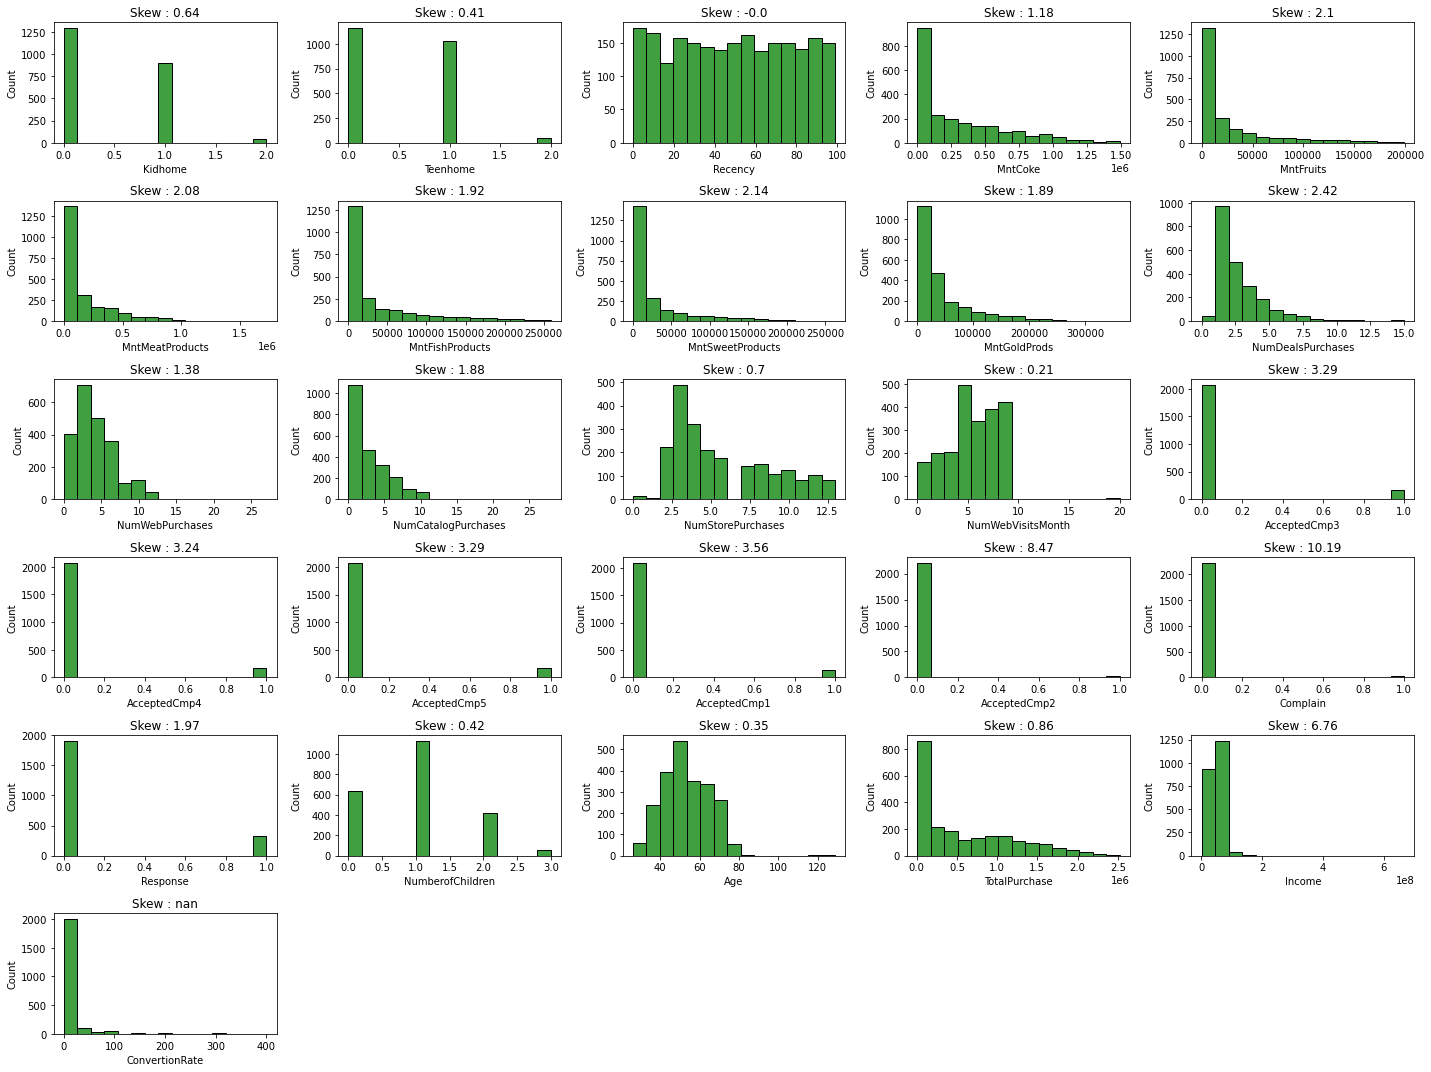

In [282]:
plt.figure(figsize=(20,15))
for d,e in enumerate(numerik):
        plt.subplot(6,5,d+1)
        sns.histplot(x=df[e], bins=15, color='green')
        plt.title("Skew : "+ str(round(df[e].skew(),2)))
plt.tight_layout()

### MULTIVARIATE ANALYSIS

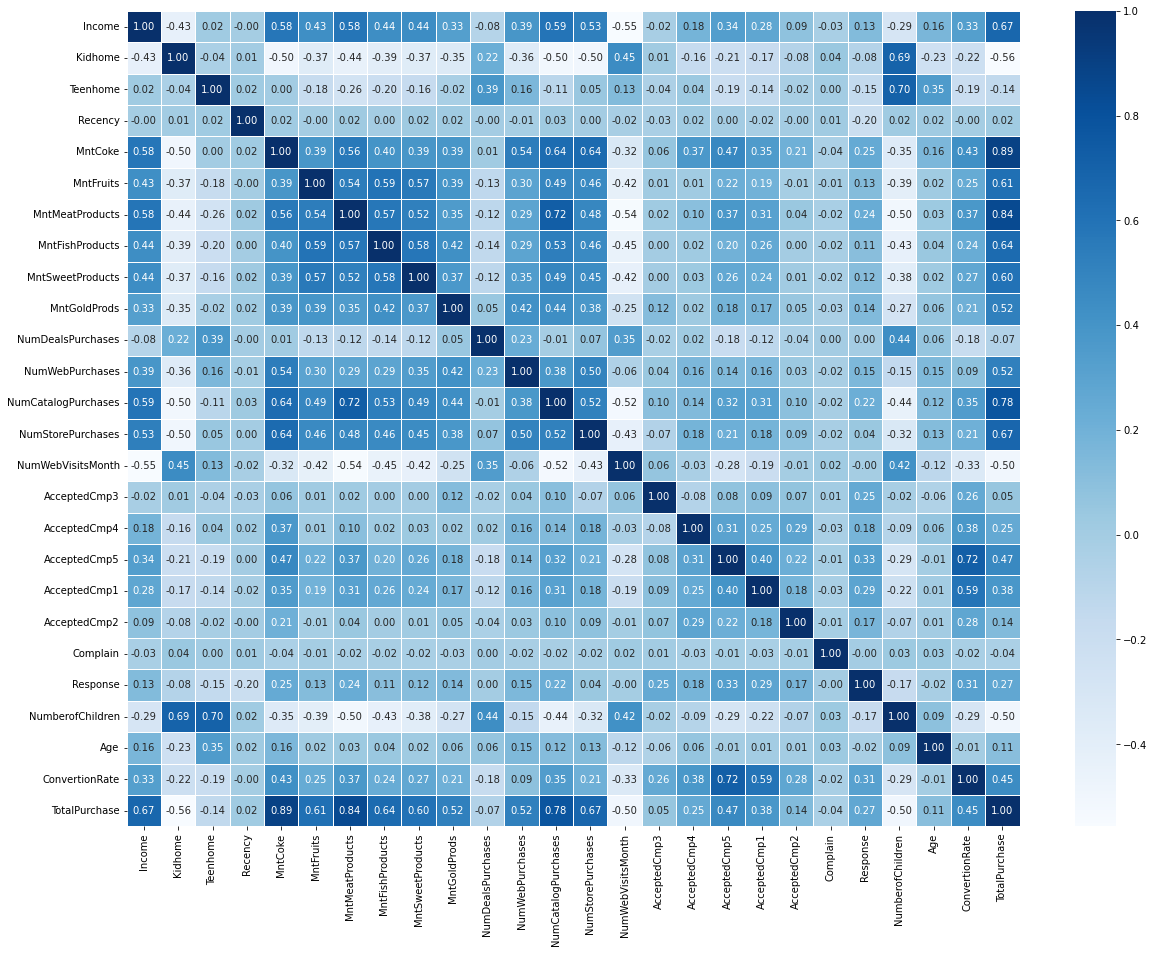

In [303]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', linewidth=1);

Kolom dengan Multikolinearitas
- MntCoke dengan TotalPurchase 
- TeenHome dengan NumberofChildren
- Kidhome dengan NumberofChildren
- MntMeatProduct dengan NumCatalogPurchases
- MntMeatProduct dengan TotalPurchase
- MntCoke dengan TotalPurchase
- NumCatalogPurchases dengan TotalPurchase

In [316]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberofChildren,Age,ConvertionRate,TotalPurchase
0,S1,Lajang,58138000.0,0,0,04/09/2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,0,65,0.0,1617000
1,S1,Lajang,46344000.0,1,1,08/03/2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,2,68,0.0,27000
2,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,0,57,0.0,776000
3,S1,Bertunangan,26646000.0,1,0,10/02/2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,1,38,0.0,53000
4,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,1,41,0.0,422000


In [317]:
df.to_csv('df_EDA.csv')